In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#import pyfits
from astropy.io import fits
import richardsplot
import pandas as pd
#from densityplot import *

In [2]:
def figsize(hscale, 
            vscale=(np.sqrt(5.0)-1.0)/2.0,
            fig_width_pt = 336.0):
   

    """
    Get the fig_width_pt by inserting \the\textwidth into LaTeX document.

    hscale is fraction of text width you want.

    vscale is fraction of hscale (defaults to golden ratio)  
    """
   
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    fig_width = fig_width_pt*inches_per_pt*hscale   # width in inches
    fig_height = fig_width*vscale                   # height in inches
    fig_size = [fig_width, fig_height]

    return fig_size

In [3]:
import palettable

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "axes.linewidth":1.5,               # width of box, 2 is too wide, 1 is too narrow
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 16,               # LaTeX default is 10pt font, font size of axis text label
    "axes.labelpad" : 6,                # Distance between label and axis
    "axes.formatter.limits":[-5, 5],    # use sci notation if log10 of axis range is smaller than first or larger than second 
    "axes.formatter.useoffset":False,
    "font.size": 16,
    "legend.fontsize": 12,              # Make the legend/label fonts a little smaller
    "xtick.labelsize": 16,              # Font size of numbers 
    "ytick.labelsize": 16,
    'xtick.major.width':1, 
    'xtick.minor.width':1, 
    'ytick.major.width':1, 
    'ytick.minor.width':1, 
    'xtick.major.size':10,             # size of tickmarks in points
    'xtick.minor.size':5, 
    'ytick.major.size':10, 
    'ytick.minor.size':5,
    'xtick.major.pad':8,               # distance between box and numbers
    'ytick.major.pad':8,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'figure.autolayout': True,
    "figure.figsize": figsize(1,1),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }

mpl.rcParams.update(pgf_with_latex)


csdark = palettable.colorbrewer.qualitative.Dark2_5.mpl_colors
cspurple = palettable.colorbrewer.sequential.BuPu_4.mpl_colors
csorange = palettable.colorbrewer.sequential.YlOrBr_5.mpl_colors



In [4]:
#import pandas as pd
#Load the ICA weights from Paul's 6-component fitting (now for DR7)
infile = 'grdr7_180126.weights'
infoHewett = pd.read_csv(infile, sep = ' ', names=["name", "redshift", "W1", "W2", "W3", "W4", "W5", "W6"])
infile1 = 'grdr7.radec'
infoCoords = pd.read_csv(infile1, sep = ' ', names=["name", "RA", "Dec"])
#print infoHewett
#print infoCoords

In [5]:

infile3 = 'grdr7_Shen2011_targ_uni.csv'
#infile4 = 'gr_info_a_short_coords_Allen2011.csv'

infoShen = pd.read_csv(infile3, skiprows=1, names=["name","RAx","DECx","SDSSNAME","RA","DEC","redshift","TARG_FLAG","UNI_FLAG","COLOR_FLAG","MIZ2","BALFLAGShen","FIRSTFRTYPE","FINTREST6CM","LOGFNU2500","R6CM2500A","LOGL3000","LOGL1350","Separation"])
#infoAllen = pd.read_csv(infile4, skiprows=1, names=["file","name","redshift","BALflag","RAx","DECx","SDSS","RAdeg","DEdeg","z","imag","SN","logF1700","logL1700","C4BI","C4d","C4Vmin","C4VMax","Separation"])

#print infoShen['redshift']

In [6]:
#Mask to pick out color-selected objects (ignores radio selected and NaN [non-DR7 objects])
cMask = np.array(infoShen['COLOR_FLAG'])

print(len(infoShen[cMask>0]))

8403


In [7]:
#Testing how many of these are UNIFORM quasars, but don't really need to do this because
#newPG_DR7.csv has this information
uMask = np.array(infoShen['UNI_FLAG']).astype(int)
print(len(infoShen[uMask>0]))
print(cMask.dtype,uMask.dtype)

bothFlags = np.bitwise_and(cMask,uMask)
bothFlags = ((cMask)&(uMask))
print(cMask.sum(),uMask.sum(),bothFlags.sum())

print(len(infoShen[bothFlags>0]))

6450
int64 int64
8403 6450 6439
6439


In [8]:
#Need to format weights for Scikit-Learn
weights = infoHewett[infoHewett.columns[2:]]
#print weights
X = np.array(weights)
print(len(X))
print(X)

# Array of each of the 6 weights
W1 = X[:,0]
W2 = X[:,1]
W3 = X[:,2]
W4 = X[:,3]
W5 = X[:,4]
W6 = X[:,5]

W0 = X[:,0]+X[:,1]+X[:,2]+X[:,3]

8653
[[ 0.02703  0.02643  0.02223  0.02143  0.00709 -0.00161]
 [ 0.02877  0.03135  0.01303  0.02401  0.00364  0.00325]
 [ 0.01492  0.03845  0.01754  0.03449 -0.00269  0.00657]
 ...
 [ 0.01862  0.0358   0.01708  0.03188 -0.00229  0.00096]
 [ 0.02149  0.03355  0.01949  0.02199 -0.00796 -0.00937]
 [ 0.04328  0.0187   0.0041   0.04733  0.01193 -0.00322]]


(1.4, 2.5)

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


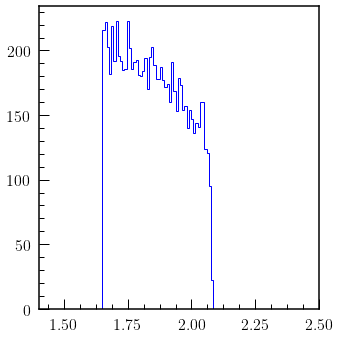

In [9]:
plt.figure(figsize=(5,5))
plt.hist(infoHewett['redshift'], color='b', bins=50, histtype='step')
plt.xlim(1.4,2.5)

In [10]:
#We are going to want to restrict the redshift range, do it like this.
zem = np.array(infoHewett['redshift'])

# Number with z<1.75
zmask = ((zem<=1.75))
print (len(infoHewett[zmask]), len(infoHewett))
print (len(X[zmask]))

2329 8653
2329


Text(0, 0.5, 'W3')

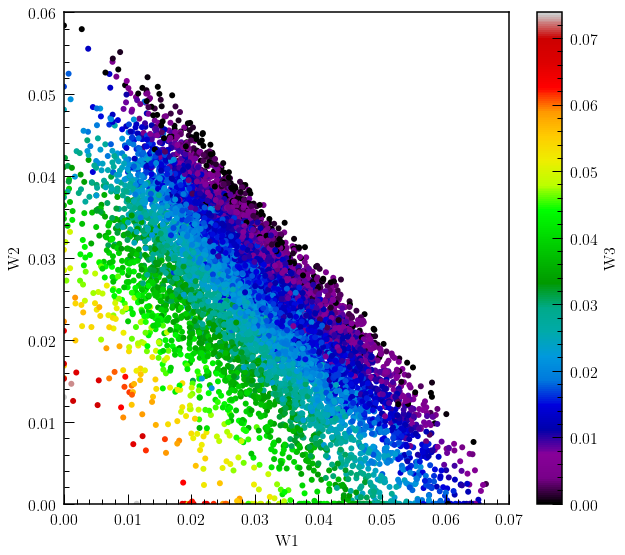

In [11]:
#Distribution of quasars in ICA weight space
plt.figure(figsize=(9,8))

plt.scatter(W1, W2, c=W3, cmap="nipy_spectral", edgecolor="None")
plt.xlabel('W1')
plt.ylabel('W2')
plt.xlim(0,0.07)
plt.ylim(0,0.06)
cbar = plt.colorbar()
cbar.ax.set_ylabel('W3')

In [12]:
# Load up saved file
# Run cell below to reproduce
projTSNE2 = np.load("projTSNE2.npy")
#print tSNE2proj[0]

In [13]:
#GTR: Did this a different way below.
#np.savetxt("grdr7.tSNE2.csv", projTSNE2, delimiter=",")

# t-SNE
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components = 2)
projTSNE2 = tsne2.fit_transform(X)

np.save("tSNE2_DR7.npy", projTSNE2)

In [14]:
print(projTSNE2)

[[-10.431032  22.933214]
 [ 21.105062  22.579042]
 [ 11.070066  74.19891 ]
 ...
 [ 13.285895  58.900265]
 [-13.282213  39.57284 ]
 [ 69.70515  -12.805232]]


In [15]:
#Output tSNE projections to file
#infile1 = 'grdr7.radec'
#infoCoords = pd.read_csv(infile1, sep = ' ', names=["name", "RA", "Dec"])

df = pd.DataFrame({'Name':infoCoords['name'],'RA':infoCoords['RA'],'Dec':infoCoords['Dec'], 'Proj1':projTSNE2[:,0], 'Proj2':-1.0*projTSNE2[:,1]})
#df.to_csv('grdr7.radec.projTSNE.csv')


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


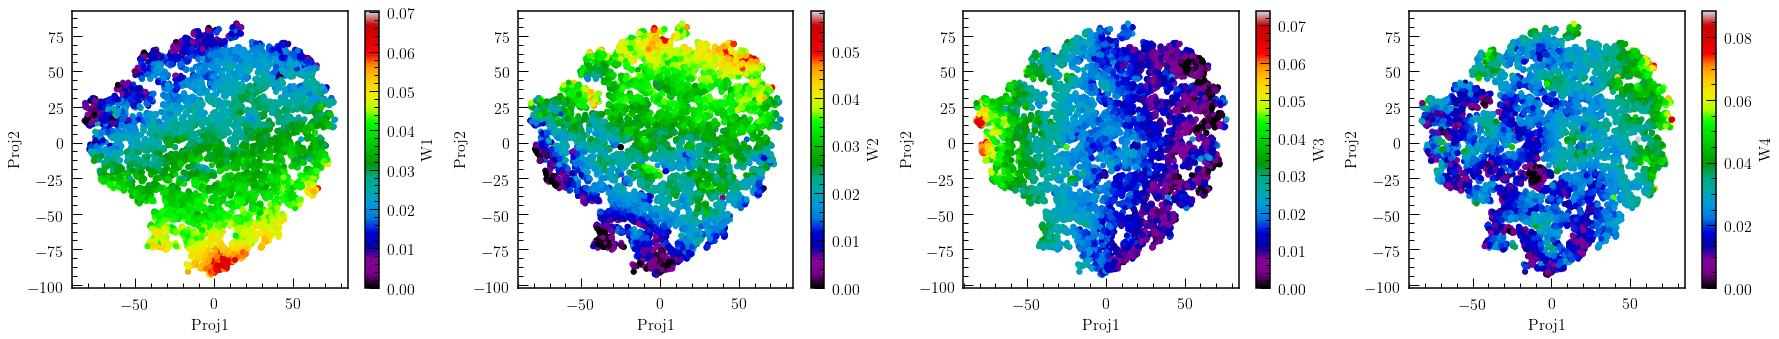

In [16]:
plt.figure(figsize=(25,5))
plt.subplot(1, 4, 1)
plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=W1, cmap="nipy_spectral", edgecolor="None")
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W1')
plt.subplot(1, 4, 2)
plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=W2, cmap="nipy_spectral", edgecolor="None")
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W2')
plt.subplot(1, 4, 3)
plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=W3, cmap="nipy_spectral", edgecolor="None")
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W3')
plt.subplot(1, 4, 4)
plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=W4, cmap="nipy_spectral", edgecolor="None")
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W4')
plt.tight_layout()

34.032160949707034 1731
1731 1858 1687 1709 1668


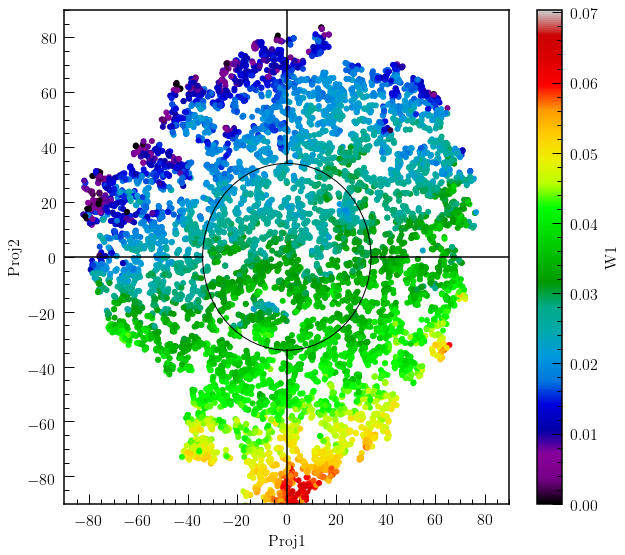

In [17]:
plt.figure(figsize=(9,8))
plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=W1, cmap="nipy_spectral", edgecolor="None")
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W1')
plt.xlim(-90,90)
plt.ylim(-90,90)


# Find radius of circle containing 20% of the sources and plot
x0 = 0 #take center of circle to be 0,0
y0 = 0
x  = projTSNE2[:,0]
y  = projTSNE2[:,1]
# Find radial coordinate of each point
r  = np.sqrt((x - x0)**2 + (y - y0)**2)
t  = 20 # percent
# Find radius that corresponds to t percentile
r0 = np.percentile(r, t)

mask0 = (r <= r0)
maskI = ((r>r0)&(x>0)&(y>0))
maskII = ((r>r0)&(x<=0)&(y>0))
maskIII = ((r>r0)&(x<=0)&(y<=0))
maskIV = ((r>r0)&(x>0)&(y<=0))

# Count the number of objects
#n_0 = (r <= r0).sum()
n_0 = mask0.sum()
print (r0, n_0)

circle=plt.Circle((0, 0), r0, color='k', fill=False)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.plot([0,0], [r0,100], c='k')
plt.plot([0,0], [-r0,-100], c='k')
plt.plot([r0,100], [0,0], c='k')
plt.plot([-r0,-100], [0,0], c='k')

n_I = maskI.sum()
n_II = maskII.sum()
n_III = maskIII.sum()
n_IV = maskIV.sum()
print( n_0,n_I, n_II, n_III, n_IV)

In [18]:
#Read in radio data
R = np.array(infoShen['R6CM2500A']).astype(float)
FIRST = np.array(infoShen['FINTREST6CM']).astype(float)

In [19]:
#Radio-loud mask
RLmask = (R>10)

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [20]:
projTSNE2rad = projTSNE2[RLmask]
print (len(projTSNE2), len(projTSNE2rad))

8653 519


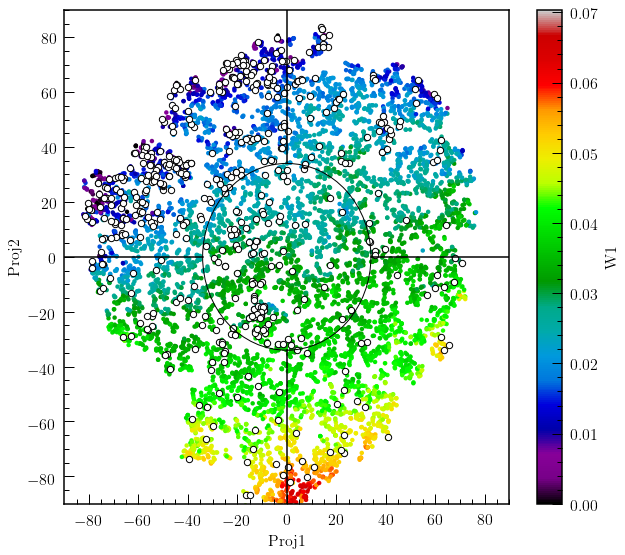

In [21]:
plt.figure(figsize=(9,8))

plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=W1, cmap="nipy_spectral", edgecolor="None", s=20)
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W1')
plt.scatter(projTSNE2rad[:,0], projTSNE2rad[:,1], c='w', edgecolor='k', s=40)
plt.xlabel("Proj1")
plt.xlim(-90,90)
plt.ylim(-90,90)

circle=plt.Circle((0, 0), r0, color='k', fill=False)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.plot([0,0], [r0,100], c='k')
plt.plot([0,0], [-r0,-100], c='k')
plt.plot([r0,100], [0,0], c='k')
plt.plot([-r0,-100], [0,0], c='k')

Compute the RL fractions

In [22]:
# Find radius of circle containing 20% of the sources and plot
x0 = 0 #take center of circle to be 0,0
y0 = 0
xRL  = projTSNE2rad[:,0]
yRL  = projTSNE2rad[:,1]
# Find radial coordinate of each point
rRL  = np.sqrt((xRL - x0)**2 + (yRL - y0)**2)
#t  = 20 # percent
# Find radius that corresponds to t percentile
#r0 = np.percentile(r, t)

mask0RL = (rRL <= r0)
maskIRL = ((rRL>r0)&(xRL>0)&(yRL>0))
maskIIRL = ((rRL>r0)&(xRL<=0)&(yRL>0))
maskIIIRL = ((rRL>r0)&(xRL<=0)&(yRL<=0))
maskIVRL = ((rRL>r0)&(xRL>0)&(yRL<=0))

# Count the number of objects
#n_0 = (r <= r0).sum()
n_0RL = mask0RL.sum()

n_IRL = maskIRL.sum()
n_IIRL = maskIIRL.sum()
n_IIIRL = maskIIIRL.sum()
n_IVRL = maskIVRL.sum()
print( n_0RL,n_IRL, n_IIRL, n_IIIRL, n_IVRL)
 
    
coreRLF = 100.0*n_0RL/n_0
quadIRLF = 100.0*n_IRL/n_I
quadIIRLF = 100.0*n_IIRL/n_II
quadIIIRLF = 100.0*n_IIIRL/n_III
quadIVRLF = 100.0*n_IVRL/n_IV
print ("Core RLF = %.2f percent" % coreRLF)
print ("Quad I RLF = %.2f percent" % quadIRLF)
print ("Quad II RLF = %.2f percent" % quadIIRLF)
print ("Quad III RLF = %.2f percent" % quadIIIRLF)
print ("Quad IV RLF = %.2f percent" % quadIVRLF)

100 72 254 62 31
Core RLF = 5.78 percent
Quad I RLF = 3.88 percent
Quad II RLF = 15.06 percent
Quad III RLF = 3.63 percent
Quad IV RLF = 1.86 percent


Same plot as above, but now with color-selection targeting mask, and limited to $1.55<z<1.65$ (large black circles).

In [23]:
#We are going to want to restrict the redshift range, do it like this.
zem = np.array(infoHewett['redshift'])

# Number with 1.55<z.1.75
#zmask = ((zem>1.65)&(zem<=1.658))
zmask = ((zem>1.645)&(zem<=1.6519))
print (len(infoHewett[zmask]), len(infoHewett))
print (len(X[zmask]))

50 8653
50


Two of these 50 are FIRST sources, 4 are BALs.

50


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


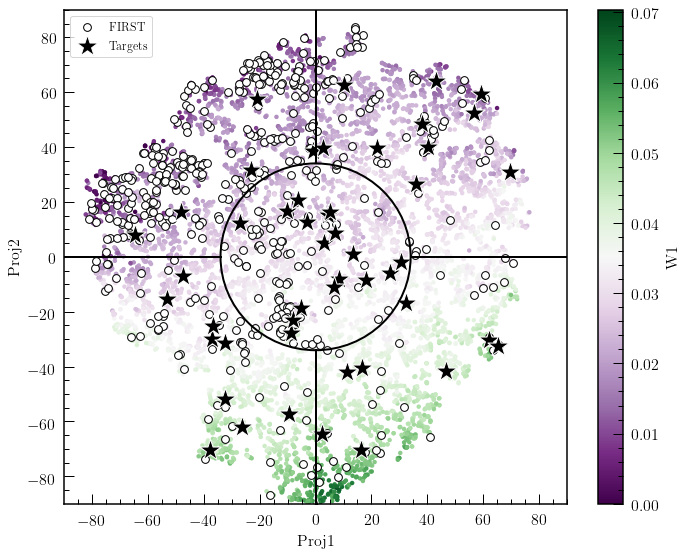

In [24]:
plt.figure(figsize=(10,8))

projTSNE2col = projTSNE2[cMask>0]
projTSNE2radcol = projTSNE2[(cMask>0)&(RLmask)]
projTSNE2colz = projTSNE2[(cMask>0)&(zmask)]
print (len(projTSNE2colz))

#Arbitrarily flip the signs of the y-axis projection so that the quadrants align with the CIV plot
#plt.scatter(projTSNE2col[:,0], -1.0*projTSNE2col[:,1], c=W1[cMask>0], cmap="nipy_spectral", edgecolor="None", s=20)
plt.scatter(projTSNE2col[:,0], projTSNE2col[:,1], c=W1[cMask>0], cmap="PRGn", edgecolor="None", s=20)
#plt.scatter(projTSNE2col[:,0], -1.0*projTSNE2col[:,1], c=W1[cMask>0], cmap="RdYlBu", edgecolor="None", s=20)
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W1')
plt.scatter(projTSNE2radcol[:,0], projTSNE2radcol[:,1], c='w', edgecolor='k', s=60, label="FIRST")
plt.scatter(projTSNE2colz[:,0], projTSNE2colz[:,1], c='k', edgecolor='w', s=500, marker='*', label="Targets")
plt.xlabel("Proj1")
plt.xlim(-90,90)
plt.ylim(-90,90)
plt.legend(loc="upper left")

circle=plt.Circle((0, 0), r0, color='k', fill=False, linewidth=2)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.plot([0,0], [r0,100], c='k', linewidth=2)
plt.plot([0,0], [-r0,-100], c='k', linewidth=2)
plt.plot([r0,100], [0,0], c='k', linewidth=2)
plt.plot([-r0,-100], [0,0], c='k', linewidth=2)
#plt.savefig('newPGtargets.pdf')

Now split up the subsamples.

In [25]:
projTSNE2colz0 = projTSNE2[(cMask>0)&(zmask)&mask0]
projTSNE2colzI = projTSNE2[(cMask>0)&(zmask)&maskI]
projTSNE2colzII = projTSNE2[(cMask>0)&(zmask)&maskII]
projTSNE2colzIII = projTSNE2[(cMask>0)&(zmask)&maskIII]
projTSNE2colzIV = projTSNE2[(cMask>0)&(zmask)&maskIV]

print (len(projTSNE2colz0), len(projTSNE2colzI), len(projTSNE2colzII), len(projTSNE2colzIII), len(projTSNE2colzIV))


17 10 5 9 9


Write out arrays with these objects

In [26]:
names=["index","name", "redshift", "W1", "W2", "W3", "W4", "W5", "W6"]
dftest = pd.DataFrame(infoHewett, columns=names)
#dftest.to_csv("test.csv")

---

Now look at tSNE in 3-D

# t-SNE
from sklearn.manifold import TSNE
tsne3 = TSNE(n_components = 3)
projTSNE3 = tsne3.fit_transform(X)

In [27]:
#np.save("tSNE3_DR7.npy", projTSNE3)

In [28]:
# Load up saved file
# Run cell below to reproduce
projTSNE3 = np.load("tSNE3_DR7.npy")
#print tSNE2proj[0]

In [29]:
from mpl_toolkits import mplot3d
#%matplotlib notebook

In [30]:
projTSNE3rad = projTSNE3[RLmask]
projTSNE3col = projTSNE3[cMask>0]
projTSNE3radcol = projTSNE3[(cMask>0)&(RLmask)]
projTSNE3colz = projTSNE3[(cMask>0)&(zmask)]
print (len(projTSNE3), len(projTSNE3rad))

8653 519


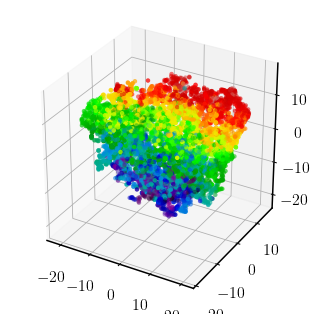

In [31]:
#Color-code 3-D tSNE by 2-D to see what the effect of adding a dimension is.
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(projTSNE3[:,0], projTSNE3[:,1], projTSNE3[:,2], c=projTSNE2[:,0], cmap="nipy_spectral", edgecolor="None")
#ax.scatter3D(projTSNE3rad[:,0], projTSNE3rad[:,1], projTSNE3rad[:,2], c=projTSNE2rad[:,1], cmap="nipy_spectral", edgecolor='None', s=40)
#ax.scatter3D(projTSNE3[:,0], projTSNE3[:,1], projTSNE3[:,2], c=W1, cmap="nipy_spectral", edgecolor="None")
#ax.set_xlabel('ProjA')
#ax.set_xlabel('ProjA')
#ax.set_ylabel('ProjB')
#ax.set_zlabel('ProjC')

plt.show()

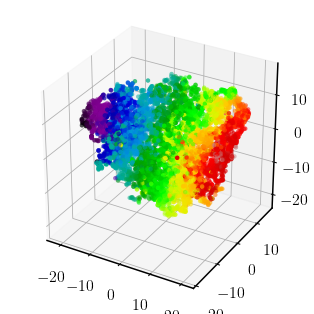

In [32]:
#Color-code 3-D tSNE by 2-D to see what the effect of adding a dimension is.
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(projTSNE3[:,0], projTSNE3[:,1], projTSNE3[:,2], c=projTSNE2[:,1], cmap="nipy_spectral", edgecolor="None")
#ax.scatter3D(projTSNE3rad[:,0], projTSNE3rad[:,1], projTSNE3rad[:,2], c=projTSNE2rad[:,1], cmap="nipy_spectral", edgecolor='None', s=40)
#ax.scatter3D(projTSNE3[:,0], projTSNE3[:,1], projTSNE3[:,2], c=W1, cmap="nipy_spectral", edgecolor="None")
#ax.set_xlabel('ProjA')
#ax.set_xlabel('ProjA')
#ax.set_ylabel('ProjB')
#ax.set_zlabel('ProjC')

#plt.show()

Actually, it makes more sense to look at the 2-D color-coded by 3-D.

Note that it is really important to remember here that there the dimensions are NOT ordered.  Thus the none of the axes are more important than the others.

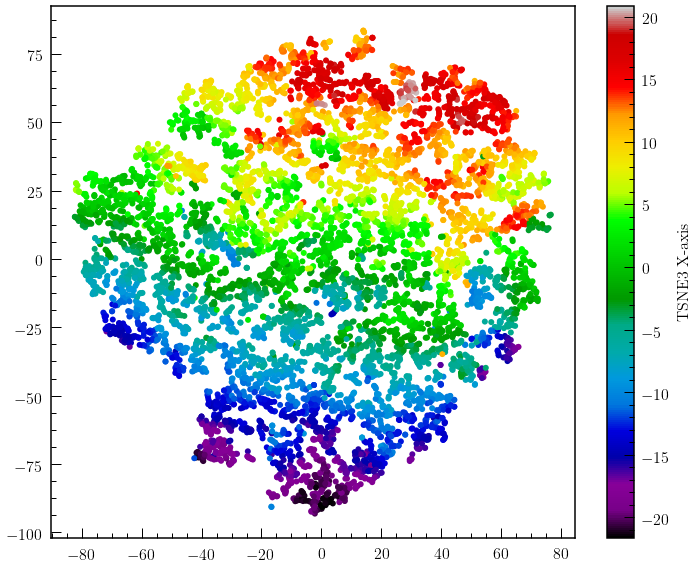

In [33]:
%matplotlib inline

plt.figure(figsize=(10,8))
plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=projTSNE3[:,0], cmap="nipy_spectral", edgecolor="None")
cbar = plt.colorbar()
cbar.ax.set_ylabel('TSNE3 X-axis')

plt.show()

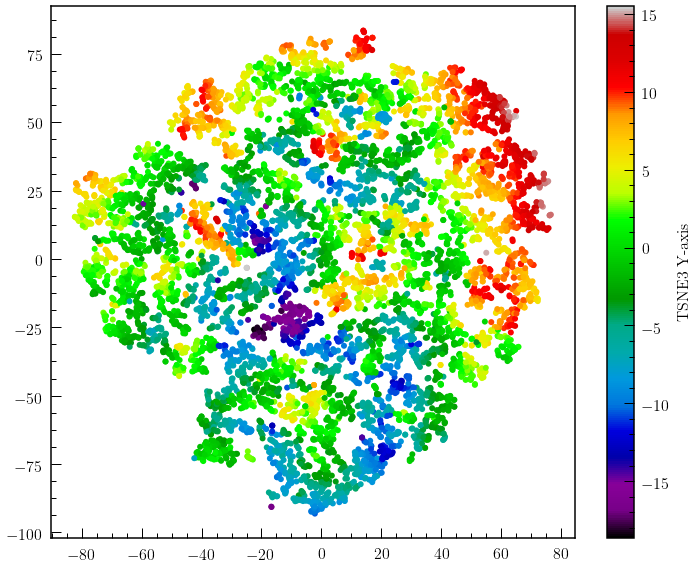

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=projTSNE3[:,1], cmap="nipy_spectral", edgecolor="None")
cbar = plt.colorbar()
cbar.ax.set_ylabel('TSNE3 Y-axis')

plt.show()

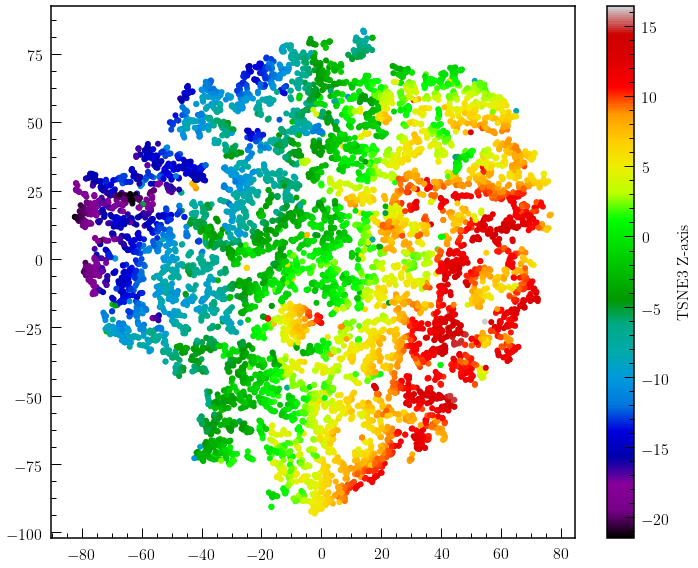

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=projTSNE3[:,2], cmap="nipy_spectral", edgecolor="None")
cbar = plt.colorbar()
cbar.ax.set_ylabel('TSNE3 Z-axis')

plt.show()

The 2nd plot above says it all.  In 2-D there is a 3rd dimension that is being projected and is causing objects that don't go together to be placed together.  (The purple in the middle).  That explains the little cluster if RL sources in the middle (and why objects on different ends of CIV are being put together).  

Split into 8 and compute the fraction of radio-detected sources in each.
Or maybe 9 with a central sphere?

Doing this by hand in an ugly way instead of with a loop, but I want to be able to see what I'm doing 

In [36]:
# Find radius of sphere containing 10% of the sources and plot
x0 = 0 #take center of sphere to be 0,0,0
y0 = 0
z0 = 0
x  = projTSNE3[:,0]
y  = projTSNE3[:,1]
z  = projTSNE3[:,2]
# Find radial coordinate of each point
r  = np.sqrt((x - x0)**2 + (y - y0)**2 + + (z - z0)**2)
t  = 10 # percent
# Find radius that corresponds to t percentile
r0 = np.percentile(r, t)

mask0 = (r <= r0)
mask1 = ((r>r0)&(x>0)&(y>0)&(z>0))
mask2 = ((r>r0)&(x<=0)&(y>0)&(z>0))
mask3 = ((r>r0)&(x<=0)&(y<=0)&(z>0))
mask4 = ((r>r0)&(x>0)&(y<=0)&(z>0))
mask5 = ((r>r0)&(x>0)&(y>0)&(z<=0))
mask6 = ((r>r0)&(x<=0)&(y>0)&(z<=0))
mask7 = ((r>r0)&(x<=0)&(y<=0)&(z<=0))
mask8 = ((r>r0)&(x>0)&(y<=0)&(z<=0))
         
# Count the number of objects
#n_0 = (r <= r0).sum()
n0 = mask0.sum()
print (r0, n0)

n1 = mask1.sum()
n2 = mask2.sum()
n3 = mask3.sum()
n4 = mask4.sum()
n5 = mask5.sum()
n6 = mask6.sum()
n7 = mask7.sum()
n8 = mask8.sum()
print( n0, n1, n2, n3, n4, n5, n6, n7, n8)

8.224786758422852 866
866 1265 742 1485 654 1112 748 883 898


In [37]:
# Find radius of sphere containing 10% of the sources and plot
x0 = 0 #take center of sphere to be 0,0,0
y0 = 0
z0 = 0
xRL  = projTSNE3rad[:,0]
yRL  = projTSNE3rad[:,1]
zRL  = projTSNE3rad[:,2]
# Find radial coordinate of each point
rRL  = np.sqrt((xRL - x0)**2 + (yRL - y0)**2 + (zRL - z0)**2)
#t  = 10 # percent
# Find radius that corresponds to t percentile
#r0 = np.percentile(r, t)

mask0RL = (rRL <= r0)
mask1RL = ((rRL>r0)&(xRL>0)&(yRL>0)&(zRL>0))
mask2RL = ((rRL>r0)&(xRL<=0)&(yRL>0)&(zRL>0))
mask3RL = ((rRL>r0)&(xRL<=0)&(yRL<=0)&(zRL>0))
mask4RL = ((rRL>r0)&(xRL>0)&(yRL<=0)&(zRL>0))
mask5RL = ((rRL>r0)&(xRL>0)&(yRL>0)&(zRL<=0))
mask6RL = ((rRL>r0)&(xRL<=0)&(yRL>0)&(zRL<=0))
mask7RL = ((rRL>r0)&(xRL<=0)&(yRL<=0)&(zRL<=0))
mask8RL = ((rRL>r0)&(xRL>0)&(yRL<=0)&(zRL<=0))

# Count the number of objects
#n_0 = (r <= r0).sum()
n0RL = mask0RL.sum()

n1RL = mask1RL.sum()
n2RL = mask2RL.sum()
n3RL = mask3RL.sum()
n4RL = mask4RL.sum()
n5RL = mask5RL.sum()
n6RL = mask6RL.sum()
n7RL = mask7RL.sum()
n8RL = mask8RL.sum()
print (n0RL, n1RL, n2RL, n3RL, n4RL, n5RL, n6RL, n7RL, n8RL)
 
    
coreRLF = 100.0*n0RL/n0
oct1RLF = 100.0*n1RL/n1
oct2RLF = 100.0*n2RL/n2
oct3RLF = 100.0*n3RL/n3
oct4RLF = 100.0*n4RL/n4
oct5RLF = 100.0*n5RL/n5
oct6RLF = 100.0*n6RL/n6
oct7RLF = 100.0*n7RL/n7
oct8RLF = 100.0*n8RL/n8
print ("Core RLF = %.2f percent" % coreRLF)
print ("Oct 1 RLF = %.2f percent" % oct1RLF)
print ("Oct 2 RLF = %.2f percent" % oct2RLF)
print ("Oct 3 RLF = %.2f percent" % oct3RLF)
print ("Oct 4 RLF = %.2f percent" % oct4RLF)
print ("Oct 5 RLF = %.2f percent" % oct5RLF)
print ("Oct 6 RLF = %.2f percent" % oct6RLF)
print ("Oct 7 RLF = %.2f percent" % oct7RLF)
print ("Oct 8 RLF = %.2f percent" % oct8RLF)

21 37 15 59 21 131 43 53 139
Core RLF = 2.42 percent
Oct 1 RLF = 2.92 percent
Oct 2 RLF = 2.02 percent
Oct 3 RLF = 3.97 percent
Oct 4 RLF = 3.21 percent
Oct 5 RLF = 11.78 percent
Oct 6 RLF = 5.75 percent
Oct 7 RLF = 6.00 percent
Oct 8 RLF = 15.48 percent


So, basically negative z is RL (for both pos and neg y and x) and the 2-D projection is giving the wrong impresssion.

In [38]:
# Find radius of circle containing 10% of the sources and plot
x0 = 0 #take center of circle to be 0,0
y0 = 0
z0 = 0
xT  = projTSNE3colz[:,0]
yT  = projTSNE3colz[:,1]
zT  = projTSNE3colz[:,2]
# Find radial coordinate of each point
rT  = np.sqrt((xT - x0)**2 + (yT - y0)**2 + (zT - z0)**2)
#t  = 10 # percent
# Find radius that corresponds to t percentile
#r0 = np.percentile(r, t)

mask0T = (rT <= r0)
mask1T = ((rT>r0)&(xT>0)&(yT>0)&(zT>0))
mask2T = ((rT>r0)&(xT<=0)&(yT>0)&(zT>0))
mask3T = ((rT>r0)&(xT<=0)&(yT<=0)&(zT>0))
mask4T = ((rT>r0)&(xT>0)&(yT<=0)&(zT>0))
mask5T = ((rT>r0)&(xT>0)&(yT>0)&(zT<=0))
mask6T = ((rT>r0)&(xT<=0)&(yT>0)&(zT<=0))
mask7T = ((rT>r0)&(xT<=0)&(yT<=0)&(zT<=0))
mask8T = ((rT>r0)&(xT>0)&(yT<=0)&(zT<=0))

# Count the number of objects
#n_0 = (r <= r0).sum()
n0T = mask0T.sum()

n1T = mask1T.sum()
n2T = mask2T.sum()
n3T = mask3T.sum()
n4T = mask4T.sum()
n5T = mask5T.sum()
n6T = mask6T.sum()
n7T = mask7T.sum()
n8T = mask8T.sum()
print (n0T, n1T, n2T, n3T, n4T, n5T, n6T, n7T, n8T)

N = len(projTSNE3colz)
 
    
coreTF = 100.0*n0T/N
oct1TF = 100.0*n1T/N
oct2TF = 100.0*n2T/N
oct3TF = 100.0*n3T/N
oct4TF = 100.0*n4T/N
oct5TF = 100.0*n5T/N
oct6TF = 100.0*n6T/N
oct7TF = 100.0*n7T/N
oct8TF = 100.0*n8T/N
print ("Core TF = %.2f percent" % coreTF)
print ("Oct 1 TF = %.2f percent" % oct1TF)
print ("Oct 2 TF = %.2f percent" % oct2TF)
print ("Oct 3 TF = %.2f percent" % oct3TF)
print ("Oct 4 TF = %.2f percent" % oct4TF)
print ("Oct 5 TF = %.2f percent" % oct5TF)
print ("Oct 6 TF = %.2f percent" % oct6TF)
print ("Oct 7 TF = %.2f percent" % oct7TF)
print ("Oct 8 TF = %.2f percent" % oct8TF)

8 8 11 6 0 4 4 4 5
Core TF = 16.00 percent
Oct 1 TF = 16.00 percent
Oct 2 TF = 22.00 percent
Oct 3 TF = 12.00 percent
Oct 4 TF = 0.00 percent
Oct 5 TF = 8.00 percent
Oct 6 TF = 8.00 percent
Oct 7 TF = 8.00 percent
Oct 8 TF = 10.00 percent


No targets in one of the octants

In [39]:
infoTrevor = pd.read_csv('../SpringFinalFigs_moreParams.csv')
infoTrevor.sort_values('col1', inplace=True)
civ_vec = infoTrevor[['RM_DIST_SCALE']].values.flatten()

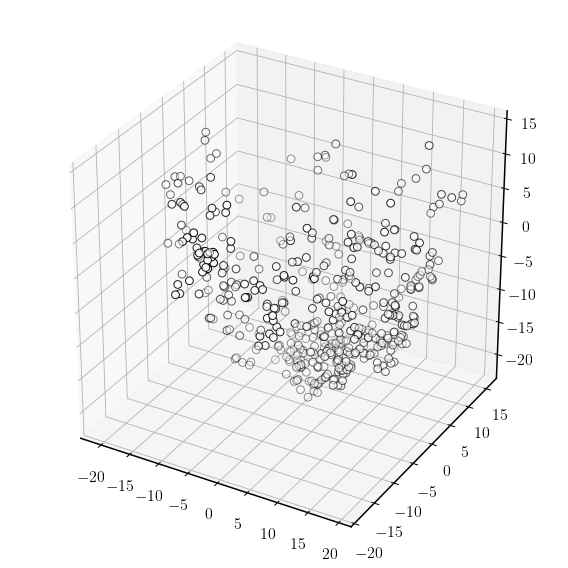

In [40]:
#%matplotlib notebook

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")

ax.scatter3D(projTSNE3radcol[:,0], projTSNE3radcol[:,1], projTSNE3radcol[:,2], c='w', edgecolor="k",s=60)

plt.show()

Text(0.5, 0, 'Proj C')

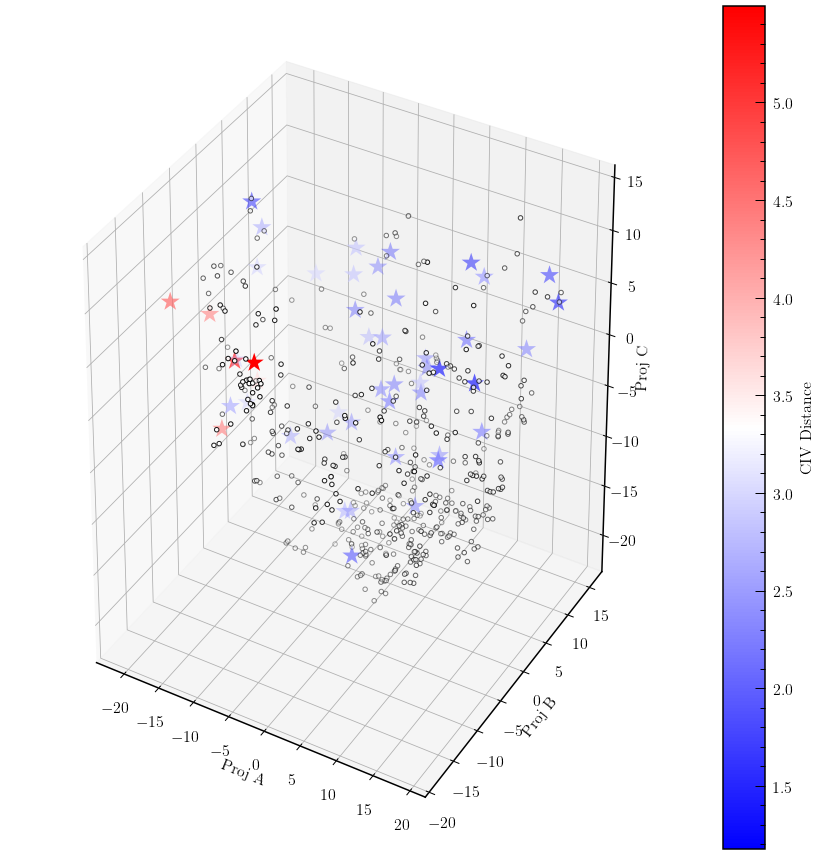

In [41]:
#%matplotlib notebook

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection="3d")

ax.scatter3D(projTSNE3radcol[:,0], projTSNE3radcol[:,1], projTSNE3radcol[:,2], c='w', edgecolor="k",s=20)
p = ax.scatter3D(projTSNE3colz[:,0][civ_vec>0], projTSNE3colz[:,1][civ_vec>0], projTSNE3colz[:,2][civ_vec>0], c=civ_vec[civ_vec>0], cmap="bwr", edgecolor="None",s=400, marker="*")

cbar = fig.colorbar(p)
cbar.ax.set_ylabel("CIV Distance")

ax.set_xlabel("Proj A")
ax.set_ylabel("Proj B")
ax.set_zlabel("Proj C")
#plt.savefig("deterministicTSNE/TSNE3_CIVColor.pdf")

Red source are high CIV blueshift low EQW, blue are the opposite

----

#### Switch to seeing how radio properties span new 3D space

In [42]:
#Parameters to test
uniform = infoTrevor[['UNI_FLAG']].values
Miz2 = infoTrevor[['MI_Z2']].values
det = infoTrevor[['detection']].values + infoTrevor[["FIRST"]].values
peak_flux = np.log10(infoTrevor[['peak_flux']].values)
int_flux = infoTrevor[['int_flux']].values
logL_rad = infoTrevor[['L_rad']].values
aro = infoTrevor[['alpha_ro']].values
ew_civ = infoTrevor[['ICA_CIV_EQW']].values
voff_civ = infoTrevor[['ICA_CIV_BLUESHIFT']].values
log_bh = infoTrevor[['LOGBH']].values
logedd_ratio = infoTrevor[['LOGEDD_RATIO']].values
logL_bol = infoTrevor[['LOGLBOL']].values
logL_civ = infoTrevor[['LOGL_CIV']].values
fwhm_civ = infoTrevor[['FWHM_CIV']].values

F = (det==2).flatten()
d = (det==1).flatten()
nd = (det==0).flatten()

#Contains location along CIV fit
nsdist = infoTrevor[['RM_DIST_UNSCALE']].values
sdist = infoTrevor[['RM_DIST_SCALE']].values

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


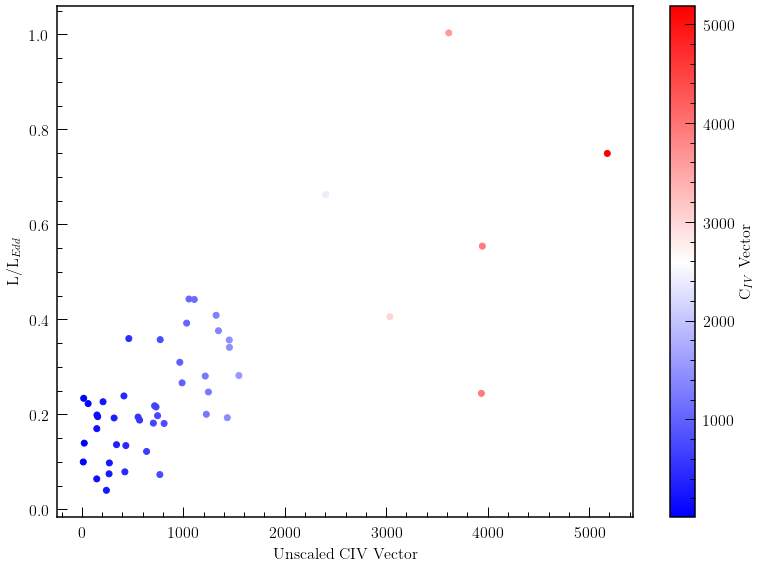

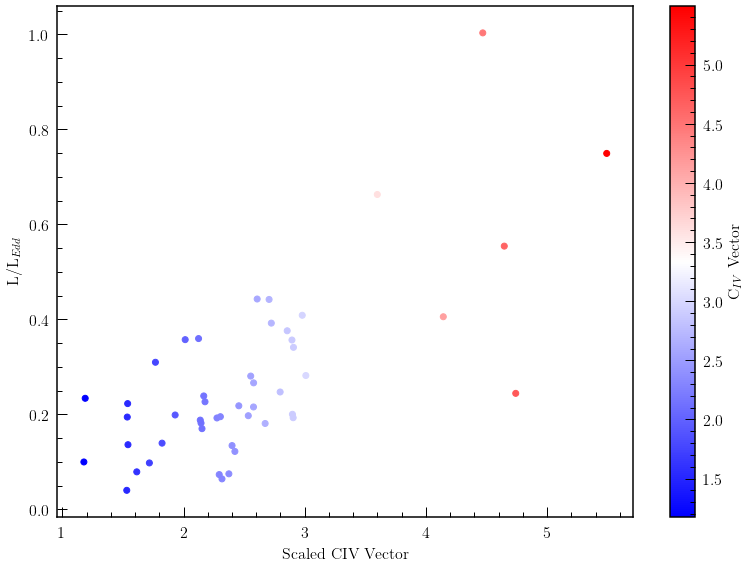

Edd.ratio =  
0.1094 x + 0.002592


In [43]:
z = np.arange(min(sdist), max(sdist), 0.1)
fit = np.poly1d(np.polyfit(sdist.flatten(), 10.**logedd_ratio.flatten(), 1))

plt.figure(figsize=(11,8))
plt.scatter(nsdist[civ_vec>0], 10.**logedd_ratio[civ_vec>0], c=nsdist[civ_vec>0], cmap="bwr")
#plt.plot(z, fit(z), '--k', alpha=0.5)
cbar = plt.colorbar()
cbar.ax.set_ylabel("C$_{IV}$ Vector")
plt.xlabel("Unscaled CIV Vector")
plt.ylabel("L/L$_{Edd}$")
plt.show()

plt.figure(figsize=(11,8))
plt.scatter(sdist[civ_vec>0], 10.**logedd_ratio[civ_vec>0], c=sdist[civ_vec>0], cmap="bwr")
#plt.plot(z, fit(z), '--k', alpha=0.5)
cbar = plt.colorbar()
cbar.ax.set_ylabel("C$_{IV}$ Vector")
plt.xlabel("Scaled CIV Vector")
plt.ylabel("L/L$_{Edd}$")
plt.show()

print("Edd.ratio =", fit)

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


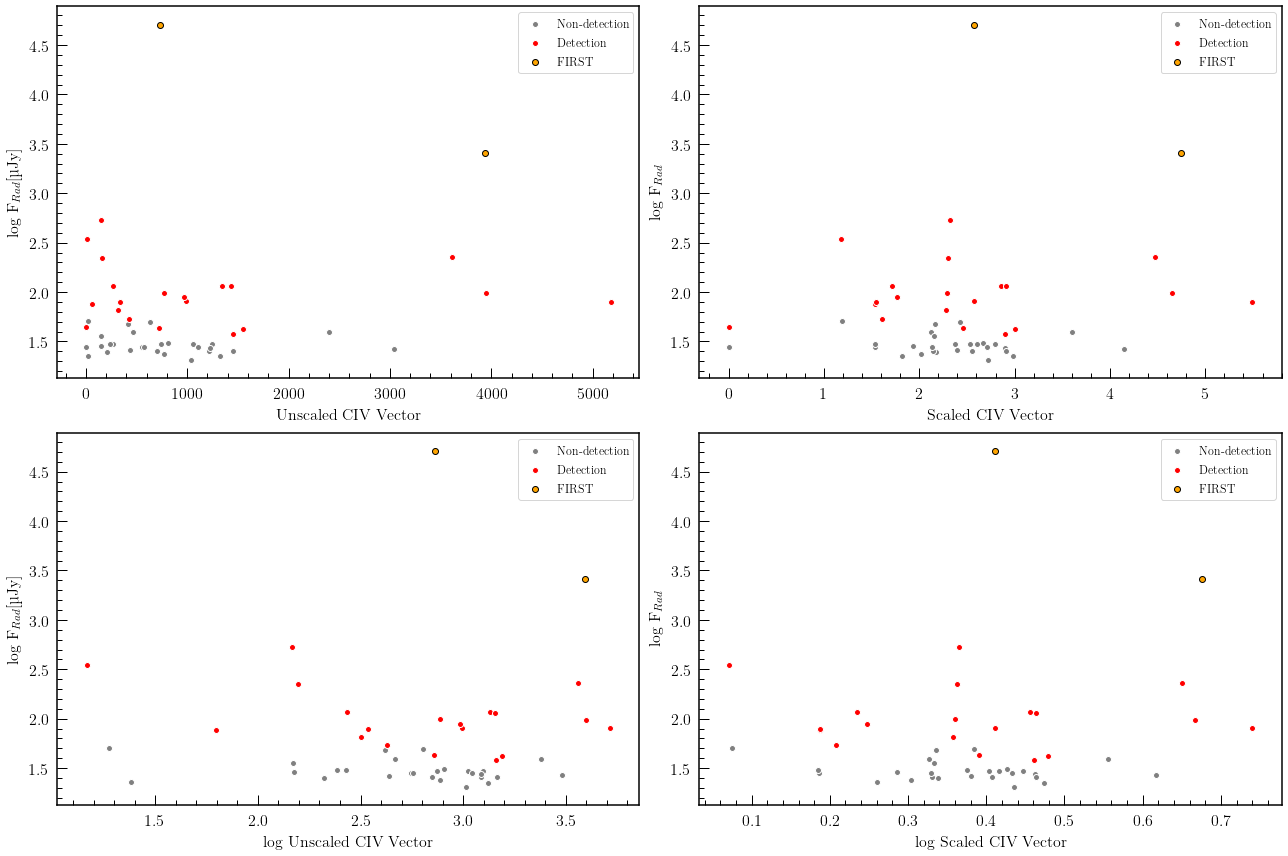

In [44]:
def scatplot(ax, var1, var2, var1name, var2name, invert=False):
    ax.scatter(var1[nd], var2[nd], facecolors='grey', edgecolors='w', label="Non-detection")
    ax.scatter(var1[d], var2[d], facecolors='r', edgecolors='w', label="Detection")
    ax.scatter(var1[F], var2[F], facecolors='orange', edgecolors='k', label="FIRST")
    ax.set_xlabel(var1name)
    ax.set_ylabel(var2name)
    ax.legend(loc="best")

    if invert: ax.invert_xaxis()

fig, axs = plt.subplots(2, 2, figsize = (18,12))

scatplot(axs[0,0], nsdist, peak_flux, "Unscaled CIV Vector", "log F$_{Rad}$[µJy]")
scatplot(axs[0,1], sdist, peak_flux, "Scaled CIV Vector", "log F$_{Rad}$")
scatplot(axs[1,0], np.log10(nsdist), peak_flux, "log Unscaled CIV Vector", "log F$_{Rad}$[µJy]")
scatplot(axs[1,1], np.log10(sdist), peak_flux, "log Scaled CIV Vector", "log F$_{Rad}$")

Text(0.5, 0, 'Proj C')

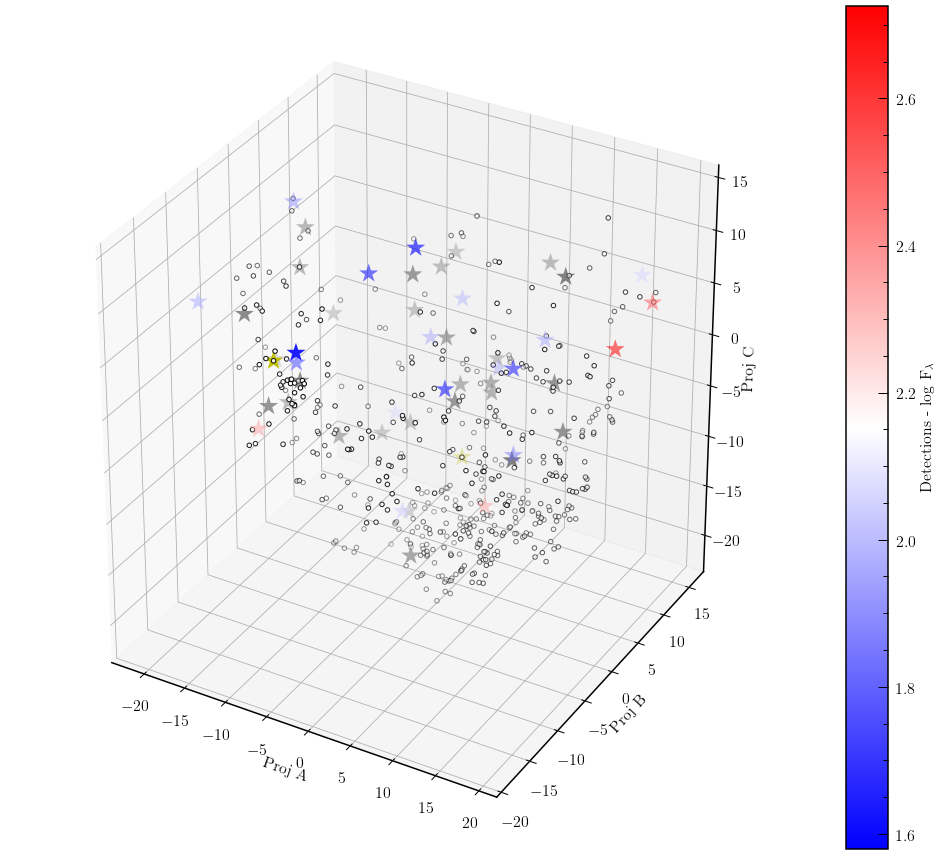

In [45]:
#%matplotlib notebook

fig = plt.figure(figsize=(14,12))
ax = plt.axes(projection="3d")

ax.scatter3D(projTSNE3radcol[:,0], projTSNE3radcol[:,1], projTSNE3radcol[:,2], c='w', edgecolor="k",s=20)
ax.scatter3D(projTSNE3colz[:,0][nd], projTSNE3colz[:,1][nd], projTSNE3colz[:,2][nd], c='grey', edgecolor="None",s=400, marker="*")
p = ax.scatter3D(projTSNE3colz[:,0][d], projTSNE3colz[:,1][d], projTSNE3colz[:,2][d], c=peak_flux[d].flatten(), cmap="bwr", edgecolor="None",s=400, marker="*")
ax.scatter3D(projTSNE3colz[:,0][F], projTSNE3colz[:,1][F], projTSNE3colz[:,2][F], c='y', edgecolor="None",s=400, marker="*")

cbar = fig.colorbar(p)
cbar.ax.set_ylabel("Detections - log F$_{\\lambda}$")

ax.set_xlabel("Proj A")
ax.set_ylabel("Proj B")
ax.set_zlabel("Proj C")

Reminder: Most FIRST sources are +ProjA, -ProjC and there *no targets* in +ProjA, -ProjB, +ProjC (i.e., octant 4)

Detections' flux density colormapped as shown, grey stars are non-detections, yellow stars are our chosen FIRST sources.  Certainly nothing obvious to take away from this plot.

Trends are more obvious when just comparing intrinsic properties (like the CIV vector, which is roughly proportial to edd. ratio).  See how some of those property vary in this space -- it is three-dimensional, after all

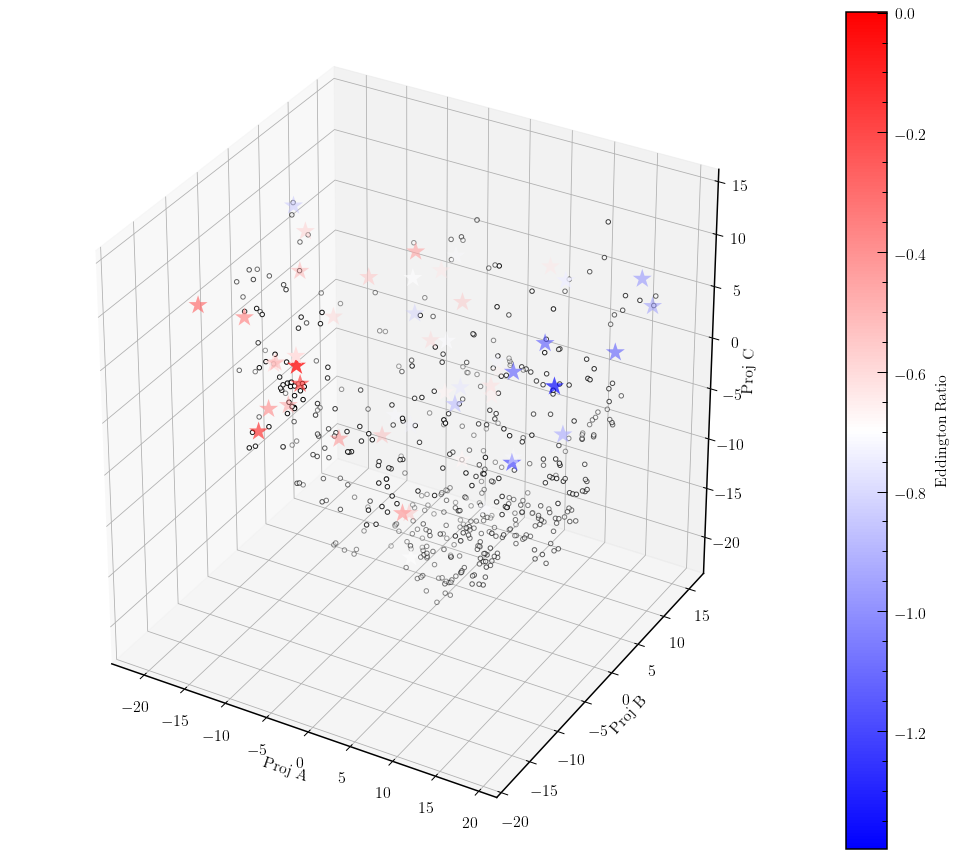

In [46]:
#%matplotlib notebook

fig = plt.figure(figsize=(14,12))
ax = plt.axes(projection="3d")

ax.scatter3D(projTSNE3radcol[:,0], projTSNE3radcol[:,1], projTSNE3radcol[:,2], c='w', edgecolor="k",s=20)
#ax.scatter3D(projTSNE3colz[:,0][civ_vec>0], projTSNE3colz[:,1][civ_vec>0], projTSNE3colz[:,2][civ_vec>0], c=civ_vec[civ_vec>0], cmap="bwr", edgecolor="None",s=400, marker="*")

#Colormap some different AGN parameters in this space for our targets
p = ax.scatter3D(projTSNE3colz[:,0], projTSNE3colz[:,1], projTSNE3colz[:,2], c=logedd_ratio.flatten(), cmap="bwr", edgecolor="None",s=400, marker="*")
#p = ax.scatter3D(projTSNE3colz[:,0], projTSNE3colz[:,1], projTSNE3colz[:,2], c=log_bh.flatten(), cmap="bwr", edgecolor="None",s=400, marker="*")
#p = ax.scatter3D(projTSNE3colz[:,0], projTSNE3colz[:,1], projTSNE3colz[:,2], c=logL_bol.flatten(), cmap="bwr", edgecolor="None",s=400, marker="*")


cbar = fig.colorbar(p)
cbar.ax.set_ylabel("Eddington Ratio")
ax.set_xlabel("Proj A") 
ax.set_ylabel("Proj B")
ax.set_zlabel("Proj C")
#plt.savefig("deterministicTSNE/TSNE3_CIVColor.pdf")
plt.show()

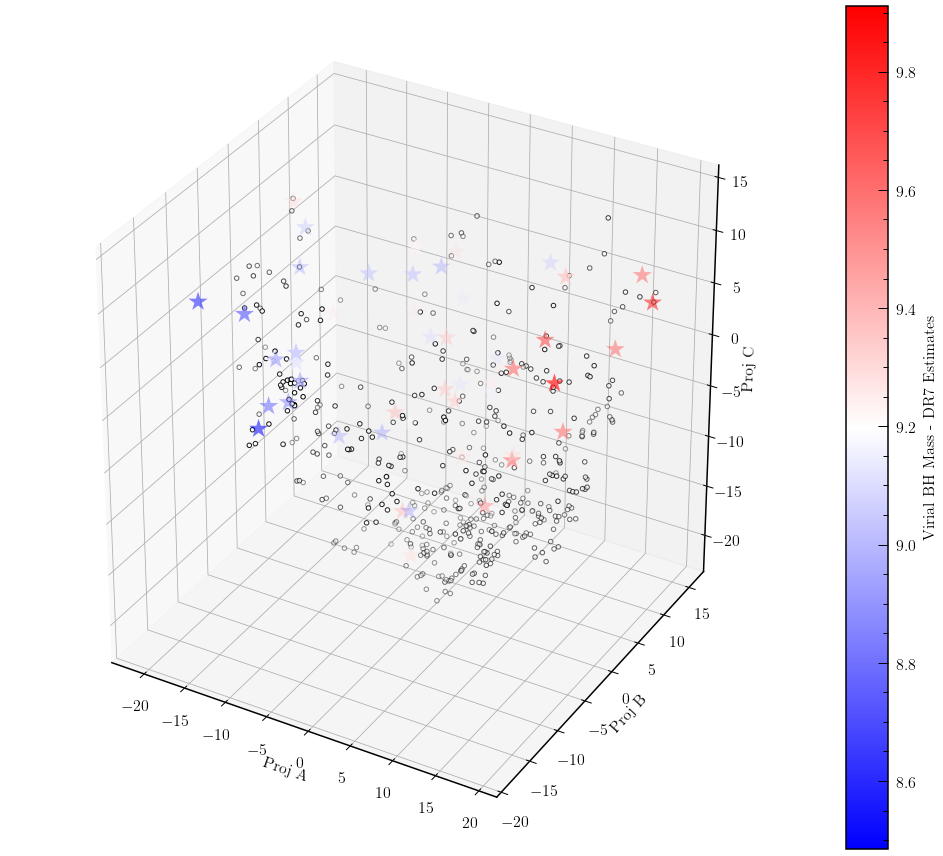

In [47]:
#%matplotlib notebook

fig = plt.figure(figsize=(14,12))
ax = plt.axes(projection="3d")

ax.scatter3D(projTSNE3radcol[:,0], projTSNE3radcol[:,1], projTSNE3radcol[:,2], c='w', edgecolor="k",s=20)
#ax.scatter3D(projTSNE3colz[:,0][civ_vec>0], projTSNE3colz[:,1][civ_vec>0], projTSNE3colz[:,2][civ_vec>0], c=civ_vec[civ_vec>0], cmap="bwr", edgecolor="None",s=400, marker="*")

#Colormap some different AGN parameters in this space for our targets
p = ax.scatter3D(projTSNE3colz[:,0], projTSNE3colz[:,1], projTSNE3colz[:,2], c=log_bh.flatten(), cmap="bwr", edgecolor="None",s=400, marker="*")
#p = ax.scatter3D(projTSNE3colz[:,0], projTSNE3colz[:,1], projTSNE3colz[:,2], c=logL_bol.flatten(), cmap="bwr", edgecolor="None",s=400, marker="*")


cbar = fig.colorbar(p)
cbar.ax.set_ylabel("Virial BH Mass - DR7 Estimates")
ax.set_xlabel("Proj A") 
ax.set_ylabel("Proj B")
ax.set_zlabel("Proj C")
#plt.savefig("deterministicTSNE/TSNE3_CIVColor.pdf")
plt.show()

Text(0, 0.5, 'log Eddington Ratio')

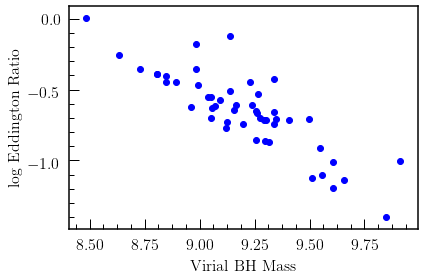

In [48]:
plt.figure()
plt.scatter(log_bh, logedd_ratio, c='b')
plt.xlabel("Virial BH Mass")
plt.ylabel("log Eddington Ratio")